In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

In [6]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[55478  1386]
 [    8    90]]


In [12]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

Accuracy : 0.9755275446789088
Precision: 0.06097560975609756
Recall   : 0.9183673469387755
F1-Score : 0.11435832274459974


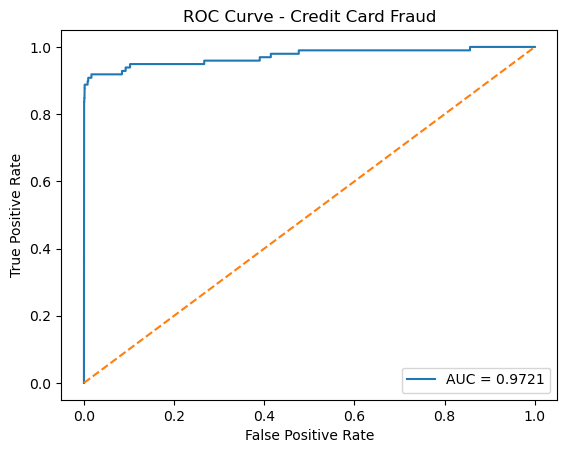

In [13]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Card Fraud")
plt.legend()
plt.show()

In [14]:
cv_scores = cross_val_score(
    LogisticRegression(max_iter=1000, class_weight="balanced"),
    X_train_scaled,
    y_train,
    cv=5,
    scoring="f1"
)

print("CV F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

CV F1 Scores: [0.12067436 0.10683761 0.11206226 0.11575563 0.12111293]
Mean CV F1: 0.1152885553958722


In [15]:
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for c in C_values:
    lr = LogisticRegression(
        C=c,
        max_iter=1000,
        class_weight="balanced"
    )
    
    lr.fit(X_train_scaled, y_train)
    
    train_scores.append(lr.score(X_train_scaled, y_train))
    test_scores.append(lr.score(X_test_scaled, y_test))

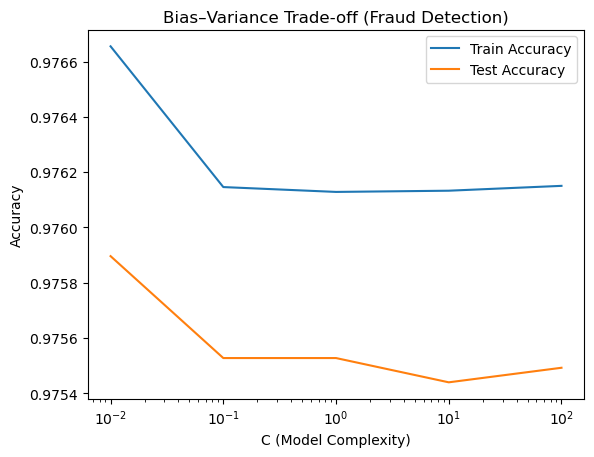

In [16]:
plt.plot(C_values, train_scores, label="Train Accuracy")
plt.plot(C_values, test_scores, label="Test Accuracy")
plt.xscale("log")
plt.xlabel("C (Model Complexity)")
plt.ylabel("Accuracy")
plt.title("Bias–Variance Trade-off (Fraud Detection)")
plt.legend()
plt.show()